# Disease Symptom Prediction

https://www.kaggle.com/datasets/itachi9604/disease-symptom-description-dataset?select=dataset.csv

## Importing libraries

In [51]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold , GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix ,classification_report
from sklearn.svm import SVC

## Importing datasets

In [52]:
for dirname, _, filenames in os.walk('Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Dataset\dataset.csv
Dataset\data_sheet.md
Dataset\Symptom-severity.csv
Dataset\symptom_Description.csv
Dataset\symptom_precaution.csv


In [53]:
data = pd.read_csv('Dataset\dataset.csv')
data.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
severity = pd.read_csv('Dataset\Symptom-severity.csv')
severity.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [55]:
description = pd.read_csv('Dataset\symptom_Description.csv')
description.head()

,Disease,Description
0,Drug Reaction,An adverse drug reaction (ADR) is an injury ca...
1,Malaria,An infectious disease caused by protozoan para...
2,Allergy,An allergy is an immune system response to a f...
3,Hypothyroidism,"Hypothyroidism, also called underactive thyroi..."
4,Psoriasis,Psoriasis is a common skin disorder that forms...


In [56]:
precaution = pd.read_csv('Dataset\symptom_precaution.csv')
precaution.head()

,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths


# Making sense of the datasets

## Preprocessing

### Main Dataset

In [57]:
data.isna().sum()

Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64

Encoding each Symptoms with its weight and filling na for the model to read

### Severity data

In [58]:
severity.isna().sum() ## no blanks so can use it as whole

Symptom    0
weight     0
dtype: int64

In [59]:
len(severity)

133

In [60]:
len(severity['Symptom'].unique()) # 1 duplicated value

132

In [61]:
severity[(severity['Symptom'].duplicated(keep = False) == True)] # 2 fluid_overload

,Symptom,weight
45,fluid_overload,6
117,fluid_overload,4


In [62]:
severity = severity.drop_duplicates(subset=['Symptom'],keep='last') # keeping last entry
severity_d = (severity.set_index('Symptom').T.to_dict('index')['weight']) ### converting to dict to map with main data

In [63]:
# adding other spelling in data but not in severity list
severity_d['dischromic _patches'] = 6
severity_d['spotting_ urination'] = 6
severity_d['foul_smell_of urine'] = 5

Replacing the symptoms name to its weight

In [64]:
for i in range(1,18):
    data[f'Symptom_{i}'] = data[f'Symptom_{i}'].str.strip().map(severity_d)

In [65]:
data.isna().sum() ## all datapoint is properly filled

Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64

In [66]:
for i in range(1,18):
    data[f'Symptom_{i}'] = data[f'Symptom_{i}'].fillna(0).astype('float64')

In [67]:
data.isna().sum()

Disease       0
Symptom_1     0
Symptom_2     0
Symptom_3     0
Symptom_4     0
Symptom_5     0
Symptom_6     0
Symptom_7     0
Symptom_8     0
Symptom_9     0
Symptom_10    0
Symptom_11    0
Symptom_12    0
Symptom_13    0
Symptom_14    0
Symptom_15    0
Symptom_16    0
Symptom_17    0
dtype: int64

### Precaution
Preparing precaution dataset to see if the patient needs to be sent to the hospital

In [68]:
precaution['Precaution_1'].unique()

array(['stop irritation', 'Consult nearest hospital', 'apply calamine',
       'reduce stress', 'wash hands with warm soapy water',
       'avoid fatty spicy food', 'cold baths', 'acetaminophen',
       'lie down', 'lie down on side', 'bath twice', 'have balanced diet',
       'soak affected area in warm water', 'meditation',
       'drink vitamin c rich drinks', 'use neem in bathing ',
       'use heating pad or cold pack', 'eat healthy',
       'drink plenty of water', 'lie down flat and raise the leg high',
       'avoid open cuts', 'massage', 'eat high calorie vegitables',
       'consult nearest hospital', 'switch to loose cloothing',
       'stop alcohol consumption', 'drink papaya leaf juice',
       'consult doctor', 'call ambulance', 'exercise',
       'stop eating solid food for while', 'cover mouth'], dtype=object)

In [69]:
precaution['Precaution_2'].unique()

array(['consult nearest hospital', 'avoid oily food',
       'cover area with bandage', 'exercise',
       'stop bleeding using pressure', 'avoid lying down after eating',
       'anti itch medicine', 'wash hands through',
       'avoid sudden change in body', 'check in pulse',
       'avoid fatty spicy food', 'use antibiotics', 'salt baths',
       'consume probiotic food', 'consume witch hazel', 'take vapour',
       'consume neem leaves', 'massage', 'increase vitamin c intake',
       'use oinments', 'wear ppe if possible', 'eat healthy',
       'antiboitic therapy', 'vaccination',
       'use detol or neem in bathing water', 'reduce stress',
       'take deep breaths', 'consult doctor', 'consume milk thistle',
       'rest', 'medication', 'chew or swallow asprin',
       'use hot and cold therapy', 'try taking small sips of water'],
      dtype=object)

In [70]:
precaution['Precaution_3'].unique()

array(['stop taking drug', 'avoid non veg food', nan, 'eat healthy',
       'consult doctor', 'maintain healthy weight',
       'avoid fatty spicy food', 'follow up', 'avoid abrupt head movment',
       'drink sugary drinks', 'drink plenty of water',
       'remove scabs with wet compressed cloth', 'reduce stress',
       'eliminate milk', 'warm bath with epsom salt', 'avoid cold food',
       'take vaccine', 'take otc pain reliver', 'use lemon balm',
       'drink cranberry juice', 'use vein compression', 'exercise',
       'keep infected area dry', 'use poloroid glasses in sun',
       'get away from trigger', 'medication',
       'eat fruits and high fiberous food', 'keep mosquitos away',
       'keep calm', 'rest', 'try acupuncture'], dtype=object)

In [71]:
precaution['Precaution_4'].unique()

array(['follow up', 'keep mosquitos out', 'use ice to compress itching',
       'get proper sleep', 'salt baths', 'exercise', 'eat healthy',
       'medication', 'relax', 'consult doctor', 'avoid too many products',
       'limit alcohol', 'consume alovera juice', 'keep fever in check',
       'avoid public places', 'take radioactive iodine treatment',
       'take probiotics', 'dont stand still for long', 'use clean cloths',
       'seek help', 'keep hydrated', nan, 'massage',
       'ease back into eating', 'rest'], dtype=object)

In [72]:
hospital_words = ['hospital','ambulance','wear ppe','therapy']

In [73]:
for i in range(1,5):
    precaution[f'Precaution_{i}'] = np.where( (precaution[f'Precaution_{i}'].str.contains('|'.join(hospital_words),case = False, na = False)),
    1,
    0
    )
precaution

,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Drug Reaction,0,1,0,0
1,Malaria,1,0,0,0
2,Allergy,0,0,0,0
3,Hypothyroidism,0,0,0,0
4,Psoriasis,0,0,0,0
5,GERD,0,0,0,0
6,Chronic cholestasis,0,0,0,0
7,hepatitis A,1,0,0,0
8,Osteoarthristis,0,1,0,0
9,(vertigo) Paroymsal Positional Vertigo,0,0,0,0


In [74]:
precaution['hospital'] = np.where(
    (precaution['Precaution_1'] == 1) | (precaution['Precaution_2'] == 1) | (precaution['Precaution_3'] == 1) | (precaution['Precaution_4'] == 1) ,
    1,
    0
)

Combining for a full dataframe

In [75]:
full_df = pd.merge(data, precaution, left_on='Disease',right_on='Disease',how='inner')

## Exploration

In [76]:
full_df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,...,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,Precaution_1,Precaution_2,Precaution_3,Precaution_4,hospital
0,Fungal infection,1.0,3.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
1,Fungal infection,3.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
2,Fungal infection,1.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
3,Fungal infection,1.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
4,Fungal infection,1.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0


<AxesSubplot:xlabel='hospital', ylabel='count'>

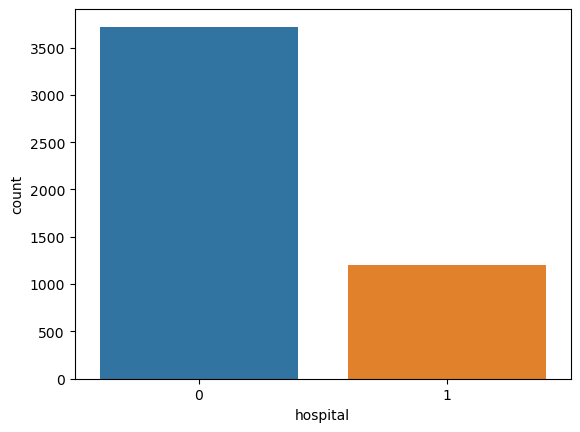

In [77]:
sns.countplot(x ='hospital',data = full_df)

In [78]:
print(f"From this data, there are {round(full_df.query('hospital==1')['Disease'].count() / len(full_df),5)} that needs to be sent to hospital")

From this data, there are 0.2439 that needs to be sent to hospital


## Model Selection

### Preparing inputs and outputs variables

In [79]:
X = full_df.iloc[:,1:18]
y = full_df.iloc[:,0]
y2 = full_df.iloc[:,-1]

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size=0.3, random_state=1)

### Random Forest

In [81]:
param_grid = {'max_depth': [3, 5, 6, 7, 8,9], 'max_features': [2,4,6,7,8,9,10,12,14,16,17],'n_estimators':[50,100],'min_samples_split': [3, 5, 6, 7]}
RanFor_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, refit=True, verbose=0)
RanFor_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 6, 7, 8, 9],
                         'max_features': [2, 4, 6, 7, 8, 9, 10, 12, 14, 16, 17],
                         'min_samples_split': [3, 5, 6, 7],
                         'n_estimators': [50, 100]})

In [82]:
print(RanFor_grid.best_score_, RanFor_grid.best_params_, RanFor_grid.best_estimator_)

0.9843179363418504 {'max_depth': 9, 'max_features': 2, 'min_samples_split': 5, 'n_estimators': 50} RandomForestClassifier(max_depth=9, max_features=2, min_samples_split=5,
                       n_estimators=50)


Fitting to best model

In [83]:
RF = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=RanFor_grid.best_params_['max_depth'],
     max_features=RanFor_grid.best_params_['max_features'], 
     max_leaf_nodes=None,min_impurity_decrease=0.0, 
     min_samples_leaf=1, min_samples_split=RanFor_grid.best_params_['min_samples_split'],min_weight_fraction_leaf=0.0, n_estimators=RanFor_grid.best_params_['n_estimators'], n_jobs=None,
     oob_score=False, random_state=None, verbose=0,warm_start=False)
RF.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, max_features=2, min_samples_split=5,
                       n_estimators=50)

In [84]:
print(classification_report(y_train, RF.predict(X_train)))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.93      0.97      0.95        88
                                   AIDS       1.00      1.00      1.00        85
                                   Acne       1.00      1.00      1.00        83
                    Alcoholic hepatitis       1.00      1.00      1.00        84
                                Allergy       1.00      0.89      0.94        79
                              Arthritis       1.00      1.00      1.00        83
                       Bronchial Asthma       1.00      1.00      1.00        85
                   Cervical spondylosis       0.96      0.95      0.96        83
                            Chicken pox       1.00      1.00      1.00        81
                    Chronic cholestasis       1.00      0.93      0.96        88
                            Common Cold       1.00      1.00      1.00        88
                           

Based on the random forest classification, the model have an average precision of 99% on the train data

### SVM

In [91]:
param_grid = {'C': [0.5,100,150,200], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['rbf']}
SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)
SVM_grid.fit(X_train2, y_train2)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.5, 100, 150, 200], 'gamma': [0.1, 0.01, 0.001],
                         'kernel': ['rbf'], 'probability': [True]})

In [92]:
print(SVM_grid.best_score_, SVM_grid.best_params_, SVM_grid.best_estimator_)

1.0 {'C': 100, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True} SVC(C=100, gamma=0.1, probability=True)


In [93]:
SVM_RBF = SVC(C=SVM_grid.best_params_['C'], cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma=SVM_grid.best_params_['gamma'],
 kernel=SVM_grid.best_params_['kernel'], max_iter=-1, probability=SVM_grid.best_params_['probability'], 
 random_state=None, shrinking=True,tol=0.001, verbose=False)
SVM_RBF.fit(X_train2, y_train2)

SVC(C=100, gamma=0.1, probability=True)

In [94]:
print(classification_report(y_train2, SVM_RBF.predict(X_train2)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2595
           1       1.00      1.00      1.00       849

    accuracy                           1.00      3444
   macro avg       1.00      1.00      1.00      3444
weighted avg       1.00      1.00      1.00      3444



## Testing of Model

### Random Forest

In [95]:
print(classification_report(y_test, RF.predict(X_test)))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      0.91      0.95        32
                                   AIDS       1.00      1.00      1.00        35
                                   Acne       1.00      1.00      1.00        37
                    Alcoholic hepatitis       1.00      1.00      1.00        36
                                Allergy       1.00      0.93      0.96        41
                              Arthritis       1.00      1.00      1.00        37
                       Bronchial Asthma       1.00      1.00      1.00        35
                   Cervical spondylosis       0.92      0.95      0.93        37
                            Chicken pox       1.00      1.00      1.00        39
                    Chronic cholestasis       1.00      1.00      1.00        32
                            Common Cold       1.00      1.00      1.00        32
                           

Based on the random forest classification, it can correctly classify up to 99% on what disease the person is suffering from

### SVM

In [96]:
print(classification_report(y_test2, SVM_RBF.predict(X_test2)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1125
           1       1.00      1.00      1.00       351

    accuracy                           1.00      1476
   macro avg       1.00      1.00      1.00      1476
weighted avg       1.00      1.00      1.00      1476



<AxesSubplot:>

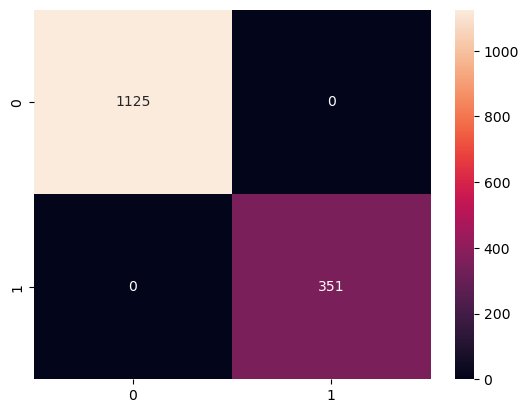

In [97]:
cm = confusion_matrix(y_test2,SVM_RBF.predict(X_test2))
sns.heatmap(cm, annot=True, fmt='G')

Based on the model for SVM, it can correctly classify which person based on symptoms to be send to the hospital and which should not